In [27]:
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt 
plt.style.use('classic')

In [3]:
# Load the files
#sgn_vloose = np.load('data17_13TeV.AllPeriods.sgn.VL_z0off_EGAM2.bkg.VetoVL_z0off_EGAM7.Rel21.GRL_v97.npz')
#sgn_loose  = np.load('sample_loose.npz')
#sgn_tight  = np.load('data17_13TeV.AllPeriods.sgn.probes_EGAM2.bkg.VProbes_EGAM7.Rel21.GRL_v97.npz')
#sgn_medium = np.load('data17_13TeV.AllPeriods.sgn.Medium_EGAM2.bkg.VetoVL_EGAM7.Rel21.GRL_v97.npz')

sgn_medium = np.load('/home/wsfreund/CERN-DATA/Offline/tuningData/mc16calo_lhgrid_v3/mc16a.zee.20M.jf17.20M.offline.binned.calo.wdatadrivenlh.npz')

In [4]:
#sgn_medium = np.load('data17_13TeV.AllPeriods.sgn.Medium_EGAM2.bkg.VetoVL_EGAM7.Rel21.GRL_v97.npz')

In [8]:
from sklearn.metrics import mutual_info_score
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

/home/caducovas/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [36]:
def calc_MI2(x, y):
    max_value = max(max(x),max(y))
    min_value = min(min(x),min(y))
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    bins_list = np.linspace(min_value, max_value, num=bins)
    #print x.shape,y.shape,len(bins_list)
    c_xy,xaaa,yaaa = np.histogram2d(x, y, bins=(bins_list,bins_list))
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi #,xaaa,yaaa,bins

In [10]:
def calc_kl(x, y):
    from scipy import stats
    max_value = max(max(x),max(y))
    min_value = min(min(x),min(y))
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    bins_list = np.linspace(min_value, max_value, num=bins)
    p,phist_bins=np.histogram(x,bins_list)
    q,qhist_bins=np.histogram(y,bins_list)
    #print(len(p),len(q))
    kl = stats.entropy(pk=p+0.00001, qk=q+0.00001)
    return kl

In [34]:
def make_ring_hist(data_file, output_folder=None):
    if output_folder==None:
        raise ValueError('output_folder needs to be specifield...')
        
    if not os.path.exists(output_folder):
        print 'Creating output folder...'
        #output_folder_pdf = output_folder+'_pdf'
        output_folder_png = output_folder+'_png'
        os.makedirs(output_folder_pdf)
        os.makedirs(output_folder_png)
    
    save_path_pdf = os.getcwd() + '/' + output_folder_pdf
    save_path_png = os.getcwd() + '/' + output_folder_png
    #print 'Saving histograms in: {}'.format(save_path)
    os.makedirs(os.path.join(save_path_pdf, 'sgn_hists'))
    os.makedirs(os.path.join(save_path_pdf, 'bkg_hists'))
    os.makedirs(os.path.join(save_path_png, 'sgn_hists'))
    os.makedirs(os.path.join(save_path_png, 'bkg_hists'))
    # Et and Eta indices
    #et_index  = [0, 1, 2]
    #etRange = ['[4, 7]','[7, 10]','[10, 15]']
    
    #et_index  = [0,1,2,3,4]
    #etRange = ['[15, 20]','[20, 30]','[30, 40]','[40, 50]']
    
    #eta_index = [0, 1, 2, 3, 4]
    #etaRange = ['[0, 0.8]','[0.8, 1.37]','[1.37, 1.54]','[1.54, 2.37]','[2.37, 2.47]']
    
    #eta_index = [0,1,2,3,4,5,6,7,8,9]
    #etaRange = ['[0, 0.6]','[0.6, 0.8]','[0.8, 1.149999]','[1.149999, 1.37]','[1.37, 1.519999]',
                #'[1.519999,1.80999]','[1.80999, 2.009999]','[2.009999, 2.369999]','[2.369999, 2.47]']

    et_index  = [1,2]
    etRange = ['[20, 30]']
    
    eta_index = [1,2]
    etaRange = ['[0.6, 0.8]']
    
    
    for iet, etrange in zip(et_index, etRange):
        for ieta, etarange in zip(eta_index, etaRange):
            sgn = data_file['signalPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            bkg = data_file['backgroundPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            print sgn[:,55].shape
            for iring in range(100):
                if iring<=7:
                    layer = 'PS'
                elif iring<=71:
                    layer = 'EM1'
                elif iring<=79:
                    layer = 'EM2'
                elif iring<=87:
                    layer = 'EM3'
                elif iring<=91:
                    layer =  'HAD1'
                elif iring<=95:
                    layer = 'HAD2'
                elif iring>95:
                    layer = 'HAD3'

                # Sgn hist
                ##plt.figure(figsize=(16,10))
                ##plt.hist(sgn[:,iring], bins='sqrt', alpha=.5, color='b', label='Signal')
                ##plt.axvline(np.max(sgn[:,iring]), color='b', linestyle='--', linewidth=.8, label='Max Signal')
                ##plt.title(r'Rings number: {} distribution $E_T$={} $\eta$={} Layer: {}'.format(iring+1, iet, ieta, layer),
                ##         fontsize=25)
                ##plt.xlabel('Energy [MeV]', fontsize=20)
                ##plt.tick_params(labelsize = 15)
                ##plt.legend(loc='best', fontsize='xx-large')
                ##plt.savefig(save_path_pdf+'/'+'sgn_hists'+'/'+'hist_sgn_et{}_eta{}_ring{}.pdf'.format(iet, ieta, iring))
                ##plt.savefig(save_path_png+'/'+'sgn_hists'+'/'+'hist_sgn_et{}_eta{}_ring{}.png'.format(iet, ieta, iring))
                ##plt.close()
                
                # Bkg hist
                ##plt.figure(figsize=(16,10))
                ##plt.hist(bkg[:,iring], bins='sqrt', alpha=.5, color='r', label='Background')
                ##plt.axvline(np.max(bkg[:,iring]), color='r', linestyle='--', linewidth=.8, label='Max Background')
                ##plt.title(r'Rings number: {} distribution $E_T$={} $\eta$={} Layer: {}'.format(iring+1, iet, ieta, layer),
                ##         fontsize=25)
                ##plt.xlabel('Energy [MeV]', fontsize=20)
                ##plt.tick_params(labelsize = 15)
                ##plt.legend(loc='best', fontsize='xx-large')
                ##plt.savefig(save_path_pdf+'/'+'bkg_hists'+'/'+'hist_bkg_et{}_eta{}_ring{}.pdf'.format(iet, ieta, iring))
                ##plt.savefig(save_path_png+'/'+'bkg_hists'+'/'+'hist_bkg_et{}_eta{}_ring{}.png'.format(iet, ieta, iring))
                ##plt.close()
                

                
                
                # Both hist in same fig
                #plt.figure(figsize=(16,10))
                fig, ax = plt.subplots(figsize=(16,10))
                b,r,rings = sgn,bkg,iring # linha de preguicoso
                rr = calc_MI2(sgn[:bkg.shape[0],iring],bkg[:,iring])
                mi_score = 100*round(np.sqrt(1. - np.exp(-2 * rr)),4)
                kl_score = round(calc_kl(sgn[:,iring],bkg[:,iring]),4)
                #chi_score,chi_pvalue =calc_chisquare(b[:,rings],r[:,rings])
                corr_score,corr_pvalue= scipy.stats.pearsonr(sgn[:bkg.shape[0],iring],bkg[:,iring])
                at = AnchoredText('Input \nMean: '+str(round(b[:,rings].mean(),2))+"\nStd: "+str(round(b[:,rings].std(),2))+"\nSkw: "+str(round(skew(b[:,rings]),2))+"\nKur: "+str(round(kurtosis(b[:,rings]),2))+"\n\nReconstructed \nMean: "+str(round(r[:,rings].mean(),2))+"\nStd: "+str(round(r[:,rings].std(),2))+"\nSkw: "+str(round(skew(r[:,rings]),2))+"\nKur: "+str(round(kurtosis(r[:,rings]),2))+"\n\nNormalized_MI: "+str(mi_score)+"\nMI: "+str(round(rr,4))+"\nCorrelation: "+str(100*round(corr_score,4))+"\nKL Div: "+str(kl_score),
                #at = AnchoredText('Input \nMean: '+str(round(b[:,rings].mean(),2))+"\nStd: "+str(round(b[:,rings].std(),2))+"\nSkw: "+str(round(skew(b[:,rings]),2))+"\nKur: "+str(round(kurtosis(b[:,rings]),2))+"\n\nReconstructed \nMean: "+str(round(r[:,rings].mean(),2))+"\nStd: "+str(round(r[:,rings].std(),2))+"\nSkw: "+str(round(skew(r[:,rings]),2))+"\nKur: "+str(round(kurtosis(r[:,rings]),2))+"\n\nCorrelation: "+str(100*round(corr_score,4))+"\nKL Div: "+str(kl_score),
                                  prop=dict(size=8), frameon=True,
                                  loc='center right',
                                 )
                at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
                ax.add_artist(at)                
                
                plt.hist(sgn[:,iring], bins='sqrt', alpha=.5, color='b', label='Signal')
                plt.hist(bkg[:,iring], bins='sqrt', alpha=.5, color='r', label='Background')
                plt.axvline(np.max(sgn[:,iring]), color='b', linestyle='--', linewidth=.8, label='Max Signal')
                plt.axvline(np.max(bkg[:,iring]), color='r', linestyle='--', linewidth=.8, label='Max Background')
                plt.title(r'Rings number: {} distribution $E_T$={} $\eta$={} Layer: {}'.format(iring+1, iet, ieta, layer),
                         fontsize=25)
                plt.xlabel('Energy [MeV]', fontsize=20)
                plt.tick_params(labelsize = 15)
                plt.legend(loc='best', fontsize='xx-large')
                #plt.savefig(save_path_pdf+'/'+'hist_et{}_eta{}_ring{}.pdf'.format(iet, ieta, iring))
                plt.savefig(save_path_png+'/'+'hist_et{}_eta{}_ring{}.png'.format(iet, ieta, iring))
                plt.close()

In [14]:
sgn[:,iring],bkg[:,iring]

NameError: name 'sgn' is not defined

Plotting histograms for 20181204_hists9
Creating output folder...
(135327,)
(93012,) (93012,) 158
(93012,) (93012,) 221
(93012,) (93012,) 280
(93012,) (93012,) 327
(93012,) (93012,) 340
(93012,) (93012,) 302
(93012,) (93012,) 340
(93012,) (93012,) 542
(93012,) (93012,) 112
(93012,) (93012,) 191
(93012,) (93012,) 459
(93012,) (93012,) 257
(93012,) (93012,) 420
(93012,) (93012,) 478
(93012,) (93012,) 607
(93012,) (93012,) 659
(93012,) (93012,) 924
(93012,) (93012,) 1037
(93012,) (93012,) 805
(93012,) (93012,) 957
(93012,) (93012,) 1220
(93012,) (93012,) 897
(93012,) (93012,) 1001
(93012,) (93012,) 939
(93012,) (93012,) 1089
(93012,) (93012,) 805
(93012,) (93012,) 838
(93012,) (93012,) 902
(93012,) (93012,) 960
(93012,) (93012,) 963
(93012,) (93012,) 683
(93012,) (93012,) 629
(93012,) (93012,) 1235
(93012,) (93012,) 1232
(93012,) (93012,) 1242
(93012,) (93012,) 956
(93012,) (93012,) 1044
(93012,) (93012,) 769
(93012,) (93012,) 1086
(93012,) (93012,) 887
(93012,) (93012,) 1493
(93012,) (93

ValueError: zero-size array to reduction operation minimum which has no identity

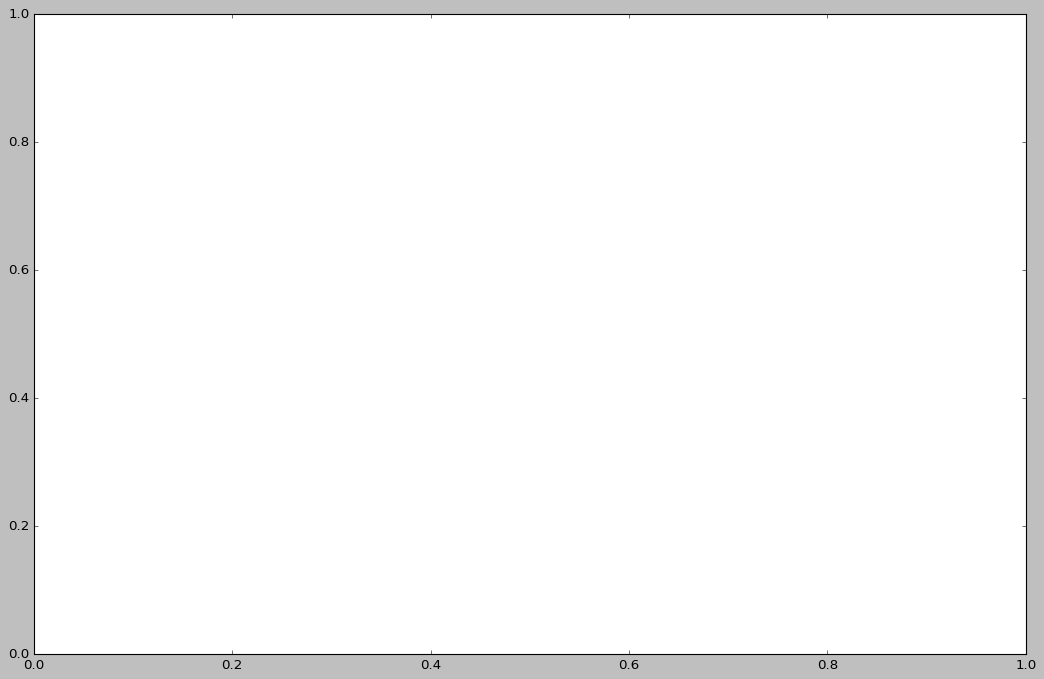

In [35]:
#folder_lists = ['tight_hists', 'medium_hists', 'loose_hists', 'veryloose_hists']
#file_lists = [sgn_tight, sgn_medium, sgn_loose, sgn_vloose]

folder_lists = ['20181204_hists9']
file_lists = [sgn_medium]

for ifile, ifolder in zip(file_lists, folder_lists):
    print 'Plotting histograms for {}'.format(ifolder)
    make_ring_hist(ifile, output_folder=ifolder)